In [1]:
# !pip install -U scikit-learn

In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The Titanic dataset

Source: https://www.kaggle.com/c/titanic/data

Read the dataframe into a variable called titanic

In [3]:
# your code here

# Import the dataset
titanic = pd.read_csv('../data/titanic.csv')

# Check the result
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Dataset's metadata
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Drop the 'Cabin' for now. 

The problem with Cabin is it has a lot of missing values. We'll see how to handle it later.

In [5]:
# your code here

# Remove the column 'Cabin'
titanic = titanic.drop(columns=['Cabin'])

# Check the result
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Count the number of missing on the dataset

After counting the number of missings, drop the them. We'll come back at them later.

In [9]:
# your code here

# Number of missing values
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [10]:
print(f'There are a total of {titanic.isna().sum().sum()} missing values in the columns "Age" and "Embarked".')

There are a total of 179 missing values in the columns "Age" and "Embarked".


In [11]:
# Filter the dataset
titanic = titanic[~((titanic.Age.isna()) | (titanic.Embarked.isna()))]

Check how much data we've dropped. And check the number of missings in the dataset again just to check if you droped it correctly.

In [12]:
# your code here

# Check the result
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


# Check some statistics of the dataset

Use `.describe()` on the resulting dataset to check some patterns on the numerical columns

In [13]:
# your code here

# Dataset's statistic summary
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [ ]:
print('''
CONCLUSIONS:
- About 40.45% of passengers survived.
- The fare was not homogeneous.
''')

What can you conclude from that? Check for example the average of survivals, the minimum and maximum Ages.

In [17]:
# your code here

# Survivals
print(f'About {titanic.Survived.mean() * 100:.2f}% of passengers survived.')

# Age
print(f'The youngest passenger on board was {titanic.Age.min()} years old and the oldest was {int(titanic.Age.max())} years old.')

About 40.45% of passengers survived.
The youngest passenger on board was 0.42 years old and the oldest was 80 years old.


# Visualizing relationships

Try to use a scatterplot on the dataframe columns 'Age' vs 'Survived' to see if you can have some insights

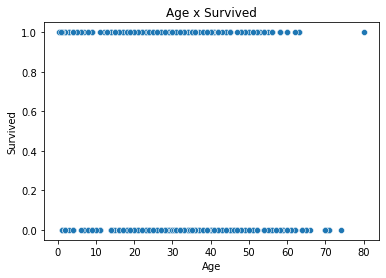

In [19]:
# your code here

# Plot the scatterplot
sns.scatterplot(x='Age', y='Survived', data=titanic)
plt.title('Age x Survived');

Now do the same for the columns 'Fare' and 'Survived'

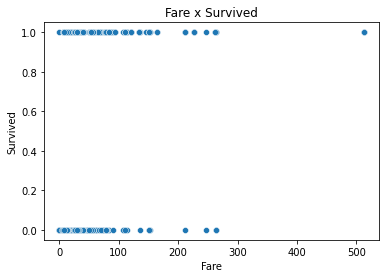

In [20]:
# your code here

# Plot the scatterplot
sns.scatterplot(x='Fare', y='Survived', data=titanic)
plt.title('Fare x Survived');

# Is there any better visualization technique to handle binary data? If so, use it to try to understand the effect of Age in the variable Survived

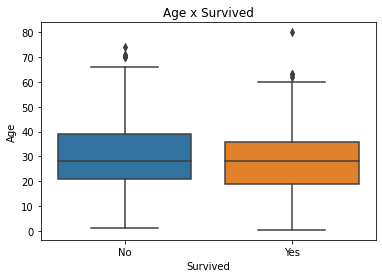

In [25]:
# your code here

# Plot
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title('Age x Survived')
plt.xticks([0, 1], ['No', 'Yes']);

# Cross Tab

Sometimes the plots above can reveal some important insights - specially if you have used some kind of, however, a better way to obtain these insights would be to use the `pd.crosstab()` 
function. Use it to explore the relations between `Age` and `Survived`. 

In [33]:
# your code here

# Check cross tabulation
pd.crosstab(index=titanic.Survived, columns=titanic.Age)

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,2,7,1,3,0,...,2,0,2,3,1,2,1,2,1,0
1,1,1,2,2,1,5,3,5,7,4,...,1,2,0,0,0,0,0,0,0,1


Now perform the same operation for `Pclass` and `Survived`

In [34]:
# your code here

# Check cross tabulation
pd.crosstab(index=titanic.Survived, columns=titanic.Pclass)

Pclass,1,2,3
Survived,,,
0,64,90,270
1,120,83,85


What can you infer from that?

In [35]:
# your code here

print('''
The passanegers of the Ticket Class 1 had a higher probability of survival and the ones from the class 3 had the lowest chance of survival.
''')


The passanegers of the Ticket Class 1 had a higher probability of survival and the ones from the class 3 had the lowest chance of survival.



# Correlations

Can you infer the same using a correlation table and a heatmap?

1. Correlation dataframe


In [37]:
# your code here

# Correlation dataframe
corr = titanic.corr()

# Check the result
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029526,-0.035609,0.033681,-0.082704,-0.011672,0.009655
Survived,0.029526,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.035609,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.082704,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,-0.011672,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.009655,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


2. Correlation Heatmap

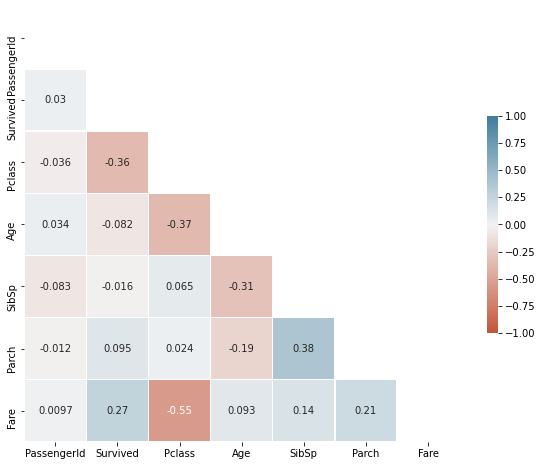

In [45]:
# your code here

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Setup the figure and ax
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

Do you think age is linearly related to the variable Survived? Do you think this variable will be important in our models?

In [47]:
# your code here

print('The linear correlation between Age and Survived is very low. Therefore, Age probabily will not be important in the model.')

The linear correlation between Age and Survived is very low. Therefore, Age probabily will not be important in the model.


# Plot the distribution of the Age variable for each category of the `Survived` variable in the same plot. 

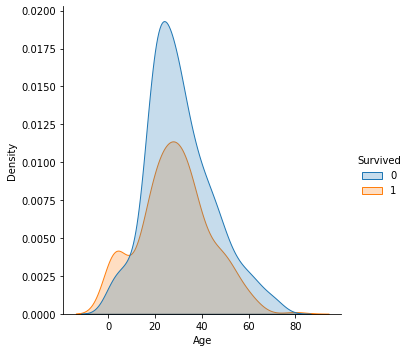

In [56]:
# your code here

sns.displot(data=titanic, x='Age', kind='kde', hue='Survived', fill=True);

# Now try to plot the same distribution but break the group into 
1. Survived, less than 18 years old male 
2. NOT Survived, less than 18 years old male 

And plot their `Age` distributions in the same graph.

In [ ]:
# your code here

Do you understand this graph? What can you conclude about the variable Age? Is it important now? How does this relate to `Age`'s linear correlation coefficient? 

In [ ]:
# your code here

# For these groups above, calculate their average of survivalness.

You probably observed a discrimination of Surivavalness around 9 years old. For this exercise, you need to calculate the average of survivalness for each of these groups to survive. Again, filter the dataset into two subgroups:

1. Males with ages less than 9
2. Males with ages greater than 9 and less than 18

What are their average survival?

In [ ]:
# your code here

*To think:* If you were told then, to predict if a 15 year old man have survived, what would you predict?

# Prepare data for our first model

### Let's start simple. 

First create a variable named `X` containing the variables `['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']`. 


Also create a pandas series containing the variable Survived. Store it in the variable `y`.

# Dummify your dataset

Create a dummy version of your `X` dataset. After obtaining the dummification of your features, you'll observe that some  You won't need both of them, so you could use the argument `drop_first=True` to get rid of the first dummy.

# Prepare your validation strategy

We'll use the validation strategy called `holdout`. For this strategy, the idea is to hide part of your dataframe to estimate the error on a data you haven't seen before. 

So you'll be able to use part of your dataset to train your model and then use the never-seen part of your dataset to have a good estimate of the error when the model goes to production.

## Separate your `X` dataset into a dataset called `X_train` and another called `X_test`. Of course, also create a pandas series containing `y_train` and `y_test`. 

# You'll be able to concat the `X_train` and `y_train`. Do the same for `X_test` and `y_test`. Put them into dataframes called `titanic_train` and `titanic_test`

# And store it on your own folder.

In [ ]:
titanic_train.to_csv('titanic_train.csv', index=False)
titanic_test.to_csv('titanic_test.csv', index=False)